In [235]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from math import sqrt
import warnings          
from scipy.optimize import minimize
from sklearn.model_selection import TimeSeriesSplit
warnings.filterwarnings('ignore')

In [114]:
#reading data set and converting string date column into datetime
df = pd.read_csv('../../Data-Sets/female_birth_ts.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [115]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


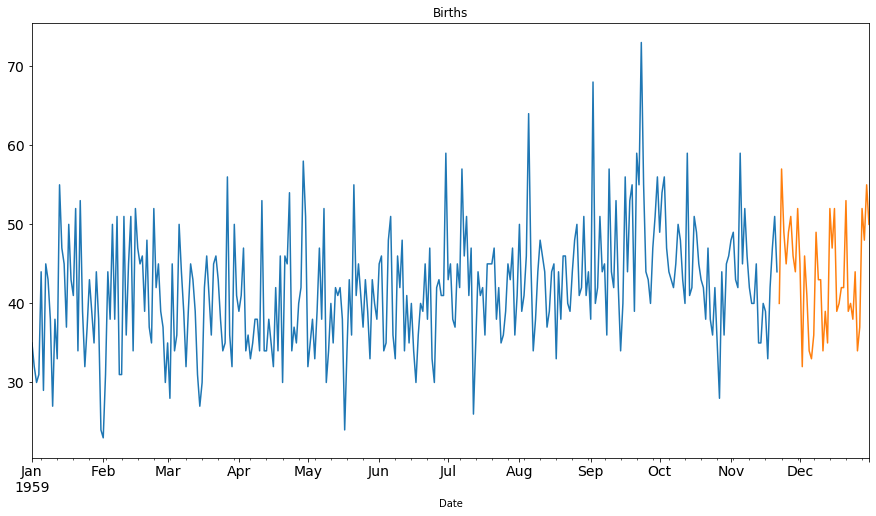

In [116]:
##train-testsplit
train=df[0:325].copy()
train.Births=train.Births.astype('double')
test=df[325:].copy()
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
plt.show()

### __Naive Method__

In [117]:
#last value of the dataframe
print('Last day of train data set:',train.Births.iloc[-1])
test['yhat_naive'] = train.Births.iloc[-1]
print('rmse:',sqrt(mean_squared_error(test.Births, test.yhat_naive)))
print('mse:',mean_absolute_error(test.Births, test.yhat_naive))

Last day of train data set: 44.0
rmse: 6.631364867054142
mse: 5.625


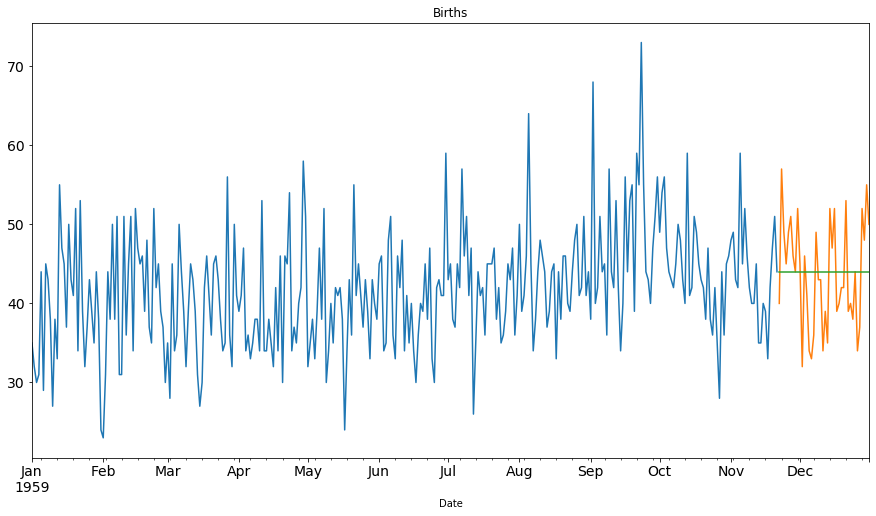

In [118]:
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_naive.plot(figsize=(15,8), title= 'Births', fontsize=14)
plt.show()

### __Simple Average__

In [119]:
#calculating the average of the data set
print('Average of the train data set:',round(train.Births.mean()))
test['yhat_simple_average'] = round(train.Births.mean())
print('rmse:',sqrt(mean_squared_error(test.Births, test.yhat_simple_average)))
print('mse:',mean_absolute_error(test.Births, test.yhat_simple_average))

Average of the train data set: 42
rmse: 6.831910420958401
mse: 5.725


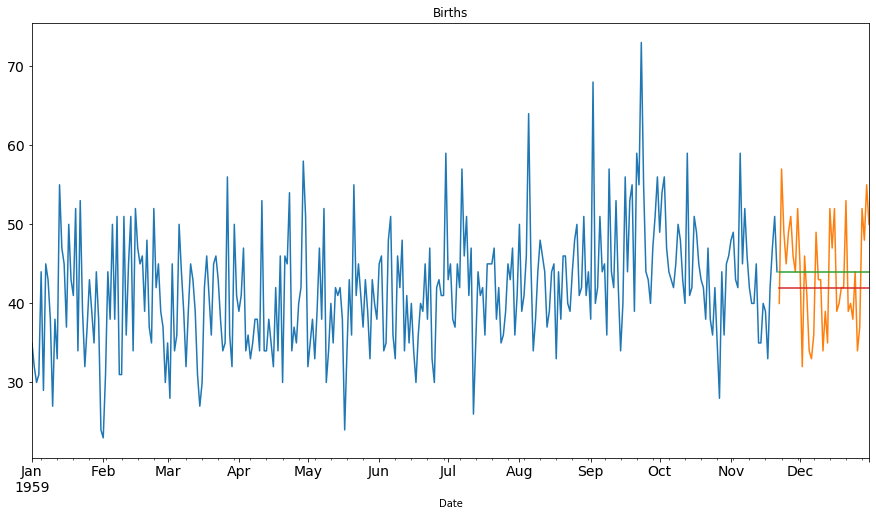

In [120]:
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_naive.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_simple_average.plot(figsize=(15,8), title= 'Births', fontsize=14)
plt.show()

### __Moving Average Method__

In [121]:
def rolling_mean(series=None, window=None):
    #calculating rolling mean and visualising with the original series

    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

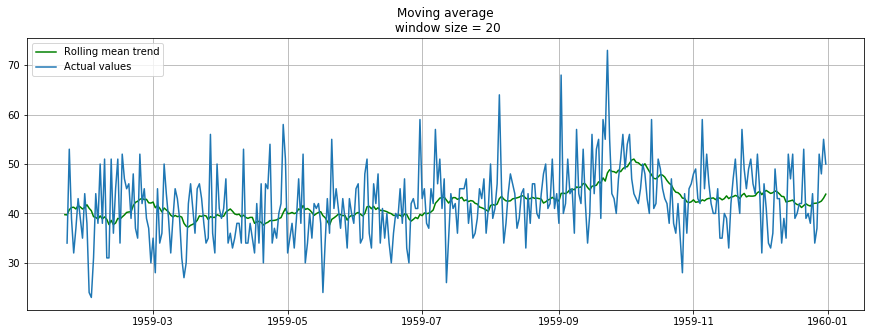

In [122]:
rolling_mean(df,20)

In [123]:
print('Rolling mean of the last n day train data set:',train.Births.rolling(window=5).mean().iloc[-1])
test['yhat_moving_average'] = train.Births.rolling(window=5).mean().iloc[-1]
print('rmse:',sqrt(mean_squared_error(test.Births, test.yhat_moving_average)))
print('mse:',mean_absolute_error(test.Births, test.yhat_moving_average))

Rolling mean of the last n day train data set: 43.4
rmse: 6.629102503355941
mse: 5.625


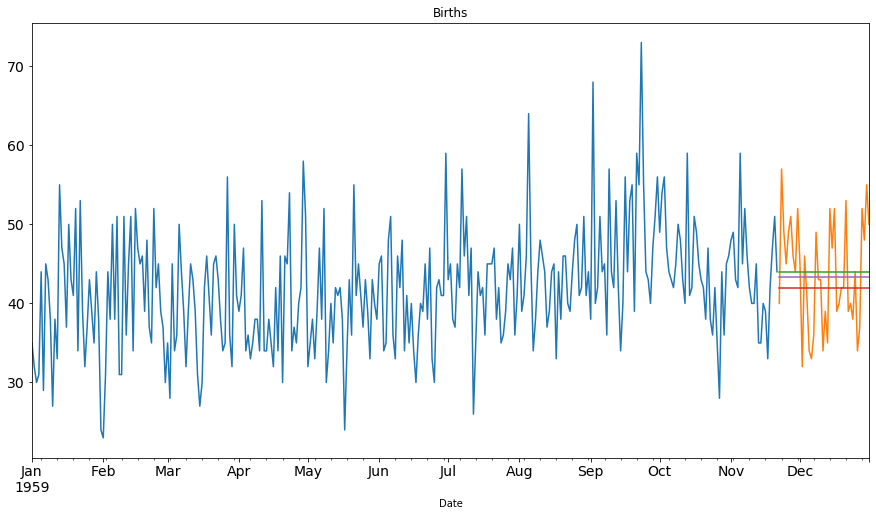

In [124]:
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_naive.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_simple_average.plot(figsize=(15,8), title= 'Births', fontsize=14)
test.yhat_moving_average.plot(figsize=(15,8), title= 'Births', fontsize=14)
plt.show()

### __Decomposition__

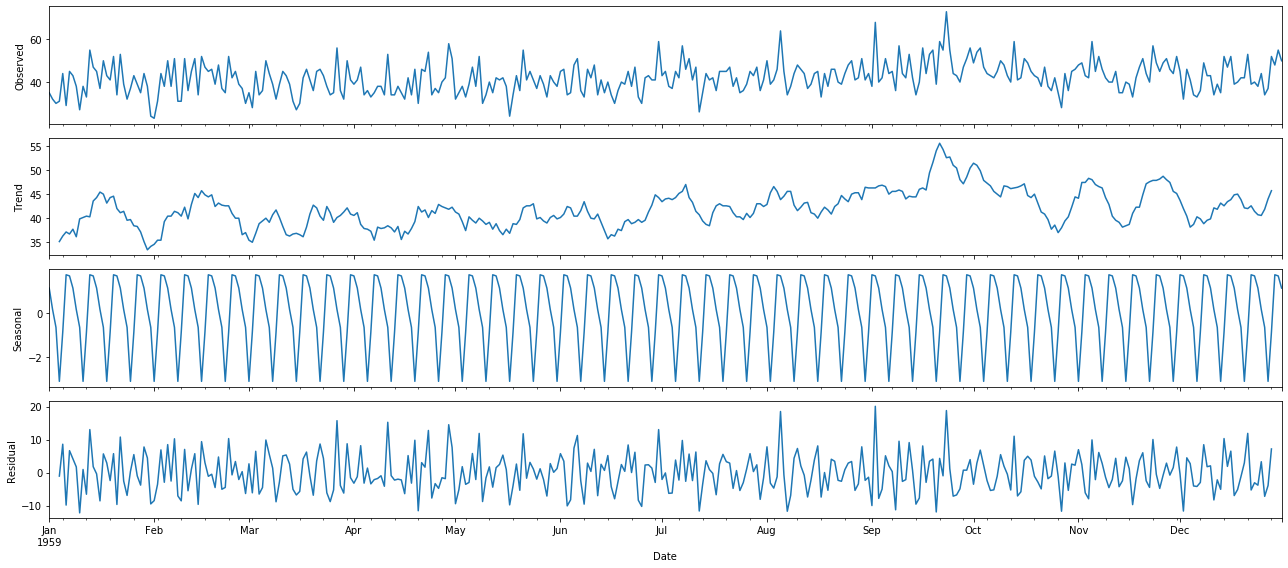

In [125]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df.Births, model='additive')
fig = decomposition.plot()
plt.show()

## __Explonential Smoothing__

### __Simple Explonential Smoothing__

In [149]:
ses = SimpleExpSmoothing(train.Births).fit()
print('Explonential smoothing with optimised alpha:',ses.forecast(1).iloc[0])
test['yhat_simple_explonential_smoothing'] = ses.forecast(1).iloc[0]
print('rmse:',sqrt(mean_squared_error(test.Births, test.yhat_simple_explonential_smoothing)))
print('mse:',mean_absolute_error(test.Births, test.yhat_simple_explonential_smoothing))

Explonential smoothing with optimised alpha: 43.26033854320109
rmse: 6.6363633959989405
mse: 5.625


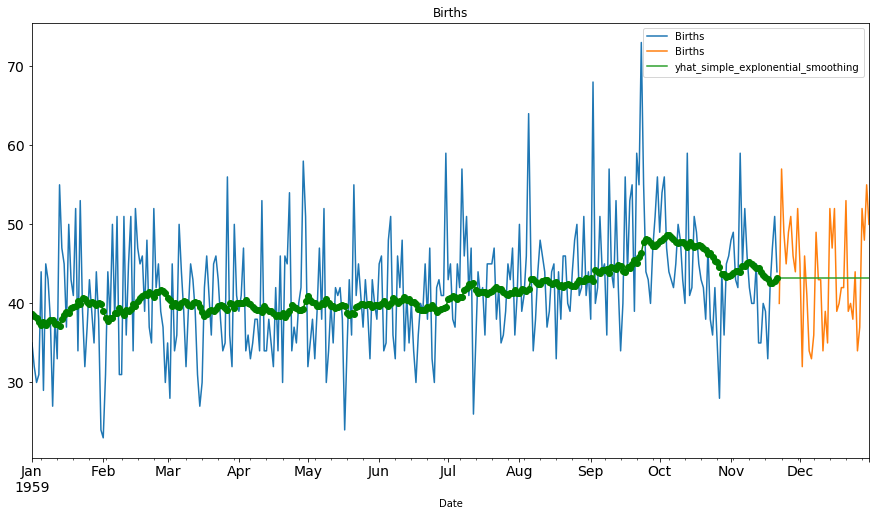

In [165]:
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.yhat_simple_explonential_smoothing.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
ses.fittedvalues.plot(marker='o', color='green')
plt.show()

### __Holt's Linear Trend__

In [187]:
holt_ = Holt(train.Births).fit()
test['yhat_holts_linear_trend'] = holt_.forecast(len(test))
print(test['yhat_holts_linear_trend'].head())
print('rmse:',sqrt(mean_squared_error(test.Births, test.yhat_holts_linear_trend)))
print('mse:',mean_absolute_error(test.Births, test.yhat_holts_linear_trend))

Date
1959-11-22    43.796683
1959-11-23    43.812965
1959-11-24    43.829246
1959-11-25    43.845528
1959-11-26    43.861809
Name: yhat_holts_linear_trend, dtype: float64
rmse: 6.650185813578663
mse: 5.671819193684614


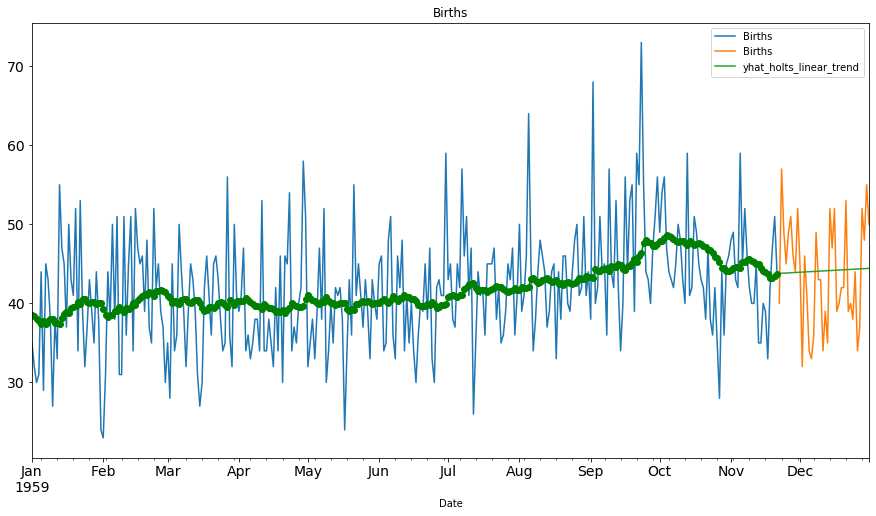

In [188]:
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.yhat_holts_linear_trend.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
holt_.fittedvalues.plot(marker='o', color='green')
plt.show()

In [176]:
holt_.params

{'smoothing_level': 0.045841004941618094,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 38.4889062004288,
 'initial_slope': 0.0162814347130714,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

### __Holt-Winter's Seasonal Method__

In [224]:
holt_winter_1 = ExponentialSmoothing(train.Births,trend='add', seasonal='add', seasonal_periods=7).fit()
test['yhat_holt_winter_1'] = holt_winter_1.forecast(len(test))
print('rmse 1:',sqrt(mean_squared_error(test.Births, test.yhat_holt_winter_1)))
print('mse_1:',mean_absolute_error(test.Births, test.yhat_holt_winter_1))

rmse 1: 7.027636409953311
mse_1: 5.842022899347187


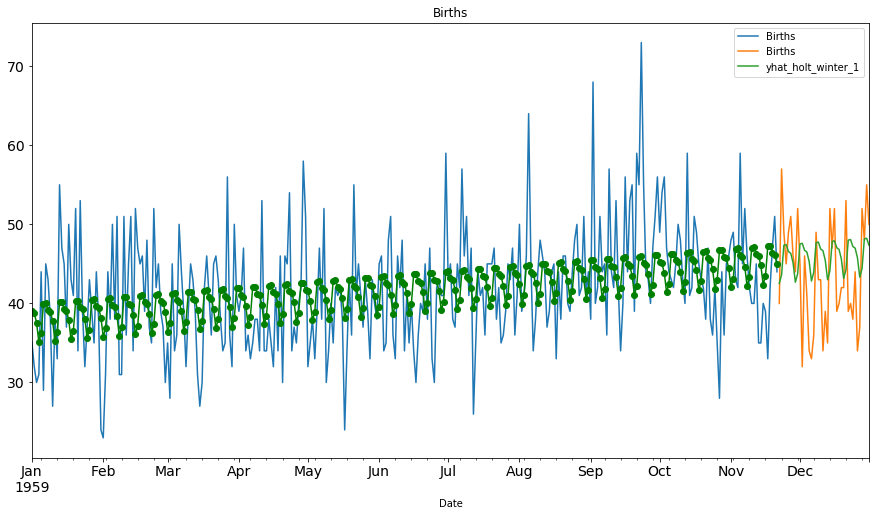

In [225]:
#Plotting data
train.Births.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.Births.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
test.yhat_holt_winter_1.plot(figsize=(15,8), title= 'Births', fontsize=14, legend=True)
holt_winter_1.fittedvalues.plot(marker='o', color='green')
plt.show()

In [226]:
holt_winter_1.params

{'smoothing_level': 5.613824431255622e-09,
 'smoothing_slope': 3.372225116418354e-17,
 'smoothing_seasonal': 3.4202598849166787e-09,
 'damping_slope': nan,
 'initial_level': 45.44284181935853,
 'initial_slope': 0.022972261924980652,
 'initial_seasons': array([ -6.46351986,  -6.70663698,  -7.93752266, -10.41527611,
         -9.3391689 ,  -5.6177454 ,  -5.56537432]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

<Figure size 1296x576 with 0 Axes>

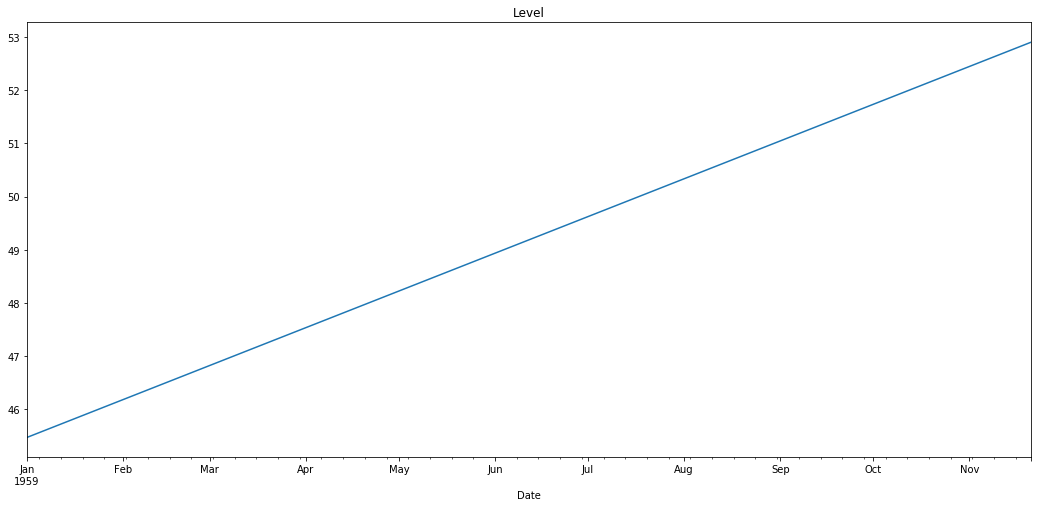

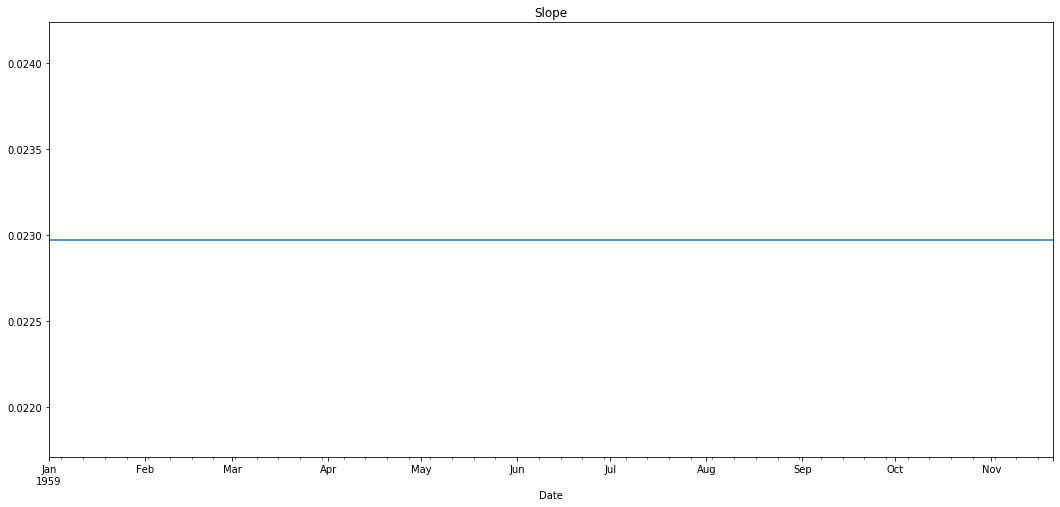

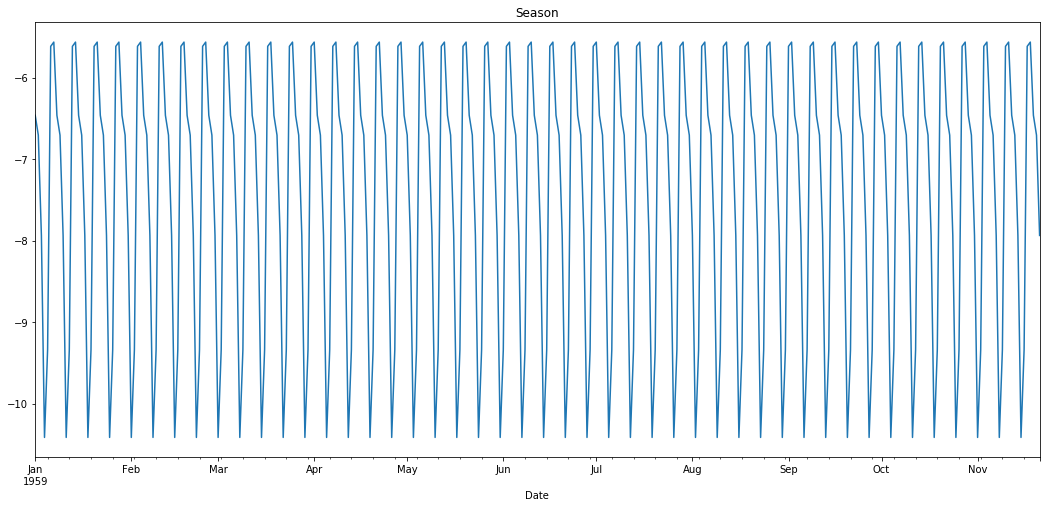

<Figure size 1296x576 with 0 Axes>

In [227]:
holt_winter_1.level.plot(title='Level')
plt.figure()
holt_winter_1.slope.plot(title='Slope')
plt.figure()
holt_winter_1.season.plot(title='Season')
plt.figure()

### __Cross Validation and Parameter Optimisation__

In [228]:
class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

In [313]:
def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=7):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train_, test_ in tscv.split(values):

        model = HoltWinters(series=values[train_], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test_))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test_):]
        actual = values[test_]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [331]:
%%time
data = df.Births[:-40] # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_squared_error), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

# ...and train the model with them, forecasting for the next 40 days
model = HoltWinters(data, slen = 7, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 40, scaling_factor = 3)
model.triple_exponential_smoothing()

0.04414604416195955 0.09792915434868898 0.3082631578447855
CPU times: user 3.92 s, sys: 20.8 ms, total: 3.94 s
Wall time: 4 s


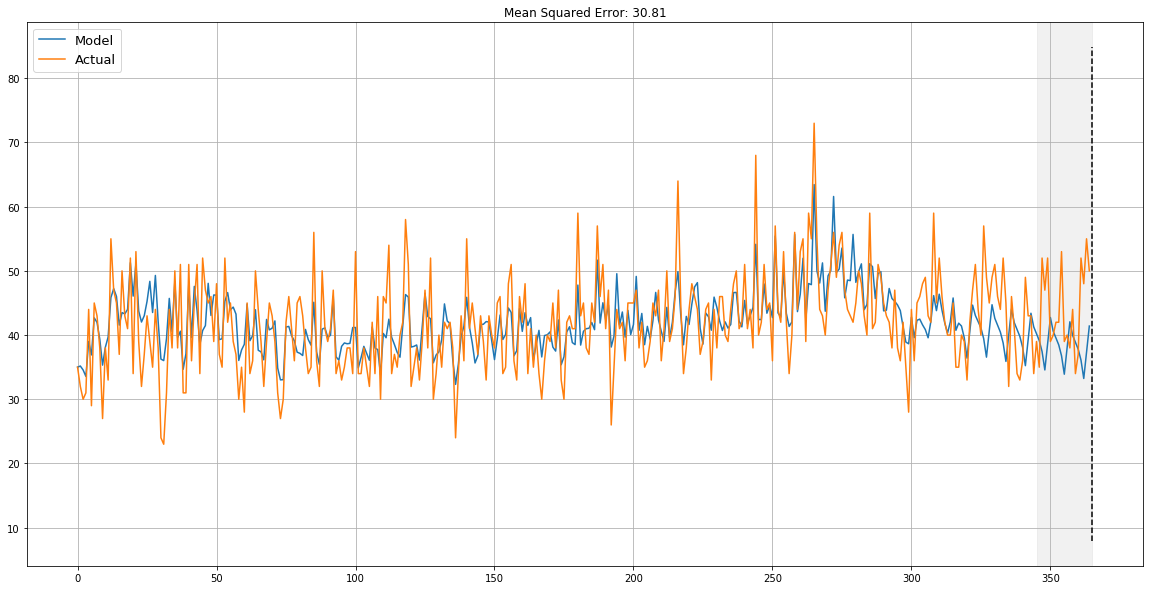

In [332]:
def plotHoltWinters(series, plot_intervals=False, plot_anomalies=False):
    """
        series - dataset with timeseries
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    plt.figure(figsize=(20, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(series.values, label = "Actual")
    error = mean_squared_error(series.values, model.result[:len(series)])
    plt.title("Mean Squared Error: {0:.2f}".format(error))
    
    plt.vlines(len(series), ymin=min(model.LowerBond), ymax=max(model.UpperBond), linestyles='dashed')
    plt.axvspan(len(series)-20, len(model.result), alpha=0.3, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);
    
plotHoltWinters(df.Births)